# Week4 事前課題２
## 住宅価格の予想
### 【問題1】練習のために特徴量の選択
---

In [17]:
import pandas as pd
import numpy as np
from pandas import Series, DataFrame
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#データフレームにデータを格納
df_0 = pd.read_csv('train.csv', index_col=0)
df = df_0.loc[:,["SalePrice", "GrLivArea", "YearBuilt"]]
df.head()

,SalePrice,GrLivArea,YearBuilt
Id,,,
1,208500,1710,2003
2,181500,1262,1976
3,223500,1786,2001
4,140000,1717,1915
5,250000,2198,2000


### 【問題2】線形回帰による推定と評価
---

In [18]:
df.describe()

,SalePrice,GrLivArea,YearBuilt
count,1460.000000,1460.000000,1460.000000
mean,180921.195890,1515.463699,1971.267808
std,79442.502883,525.480383,30.202904
min,34900.000000,334.000000,1872.000000
25%,129975.000000,1129.500000,1954.000000
50%,163000.000000,1464.000000,1973.000000
75%,214000.000000,1776.750000,2000.000000
max,755000.000000,5642.000000,2010.000000


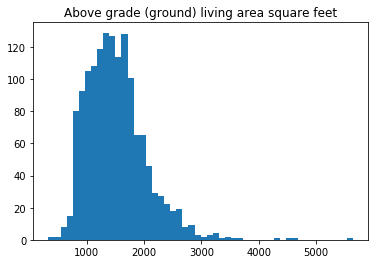

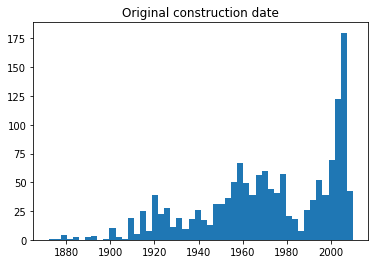

In [19]:
#ヒストグラム
plt.title("Above grade (ground) living area square feet")
plt.hist(df.GrLivArea, bins=50)
plt.show()

plt.title("Original construction date")
plt.hist(df.YearBuilt, bins=50)
plt.show()

In [20]:
#相関行列
df.corr()

,SalePrice,GrLivArea,YearBuilt
SalePrice,1.000000,0.708624,0.522897
GrLivArea,0.708624,1.000000,0.199010
YearBuilt,0.522897,0.199010,1.000000


[]

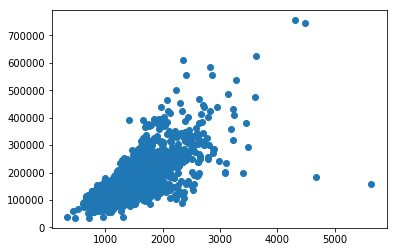

In [21]:
#散布図
plt.scatter(df.GrLivArea, df.SalePrice,)
plt.plot()


[]

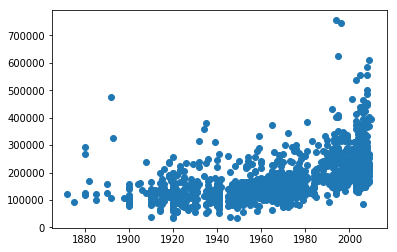

In [22]:
plt.scatter(df.YearBuilt, df.SalePrice)
plt.plot()

#### 【データの外観】
- 欠損値は無し
- ターゲットとの相関は２特徴量共にある程度ある
- 特徴量同士の相関は低い

#### 前処理・標準化


In [23]:
from sklearn.model_selection import train_test_split

X = df.iloc[:,[1,2]].values
y = df["SalePrice"].values

(X_train, X_test, y_train, y_test) = train_test_split(X, y, test_size=0.25, random_state=0,) #シードも設定しておく

print("X_train", np.shape(X_train))
print("X_test", np.shape(X_test))
print("Y_train", np.shape(y_train))
print("Y_test", np.shape(y_test))

X_train (1095, 2)
X_test (365, 2)
Y_train (1095,)
Y_test (365,)


In [24]:
from sklearn.preprocessing import StandardScaler

#X_trainのパラメータを計算
sc = StandardScaler()
sc.fit(X_train)
print("相対的なスケーリング", sc.scale_)
print("平均値", sc.mean_)
print("分散値", sc.var_)
print("サンプル数", sc.n_samples_seen_)

相対的なスケーリング [516.44246283  30.19163989]
平均値 [1521.17077626 1971.00639269]
分散値 [266712.81741081    911.53511895]
サンプル数 1095


/Users/ishizucat/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [25]:
X_train_sc = sc.transform(X_train)
X_test_sc = sc.transform(X_test)

/Users/ishizucat/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/ishizucat/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


### 【問題２】線形回帰による推定と評価
---


In [26]:
#線形回帰による推定

from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train, y_train)

print('coefficient = ', reg.coef_[0]) # 説明変数の係数を出力
print('intercept = ', reg.intercept_) # 切片を出力

coefficient =  98.58889200447537
intercept =  -2021422.1021001097


In [32]:
#平均二乗誤差による評価

from sklearn.metrics import mean_squared_error

y_train_pred = reg.predict(X_train_sc) # 学習データに対する目的変数を予測
y_pred = reg.predict(X_test_sc)   # 検証データに対する目的変数を予測

print('MSE train data: ', mean_squared_error(y_train, y_train_pred)) # 学習データを用いたときの平均二乗誤差を出力
print('MSE test data : ', mean_squared_error(y_test, y_pred))         # 検証データを用いたときの平均二乗誤差を出力

reg_list = [mean_squared_error(y_train, y_train_pred), 
           mean_squared_error(y_test, y_pred),
           mean_squared_error(y_train, y_train_pred) / mean_squared_error(y_test, y_pred)]

MSE train data:  4855599844736.405
MSE test data :  4859165484016.436


学習データ、検証データそれぞれを用いたときの平均二乗誤差を比較すると、検証データを用いたときの誤差の方が大きいことがわかる。このことから、構築した線形モデルは学習データにフィットしすぎている（過学習）ことが示唆される。

### 【問題3】手法の比較
---

In [33]:
#SVR
from sklearn.svm import SVR

svr = SVR()
svr.fit(X_train, y_train)

y_train_pred = svr.predict(X_train_sc) # 学習データに対する目的変数を予測
y_pred = svr.predict(X_test_sc)   # 検証データに対する目的変数を予測

print('MSE train data: ', mean_squared_error(y_train, y_train_pred)) # 学習データを用いたときの平均二乗誤差を出力
print('MSE test data : ', mean_squared_error(y_test, y_pred))         # 検証データを用いたときの平均二乗誤差を出力

svr_list = [mean_squared_error(y_train, y_train_pred), 
           mean_squared_error(y_test, y_pred),
           mean_squared_error(y_train, y_train_pred)/ mean_squared_error(y_test, y_pred)]

MSE train data:  6540718821.74812
MSE test data :  6962359707.7352085


In [34]:
#DecisionTreeRegressor
from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor()
dtr.fit(X_train, y_train)

y_train_pred = dtr.predict(X_train_sc) # 学習データに対する目的変数を予測
y_pred = dtr.predict(X_test_sc)   # 検証データに対する目的変数を予測

print('MSE train data: ', mean_squared_error(y_train, y_train_pred)) # 学習データを用いたときの平均二乗誤差を出力
print('MSE test data : ', mean_squared_error(y_test, y_pred))         # 検証データを用いたときの平均二乗誤差を出力

dtr_list = [mean_squared_error(y_train, y_train_pred), 
           mean_squared_error(y_test, y_pred),
           mean_squared_error(y_train, y_train_pred) / mean_squared_error(y_test, y_pred)]

MSE train data:  20784764525.080364
MSE test data :  21360603228.424656


In [35]:
#RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor()
rfr.fit(X_train, y_train)

y_train_pred = rfr.predict(X_train_sc) # 学習データに対する目的変数を予測
y_pred = rfr.predict(X_test_sc)   # 検証データに対する目的変数を予測

print('MSE train data: ', mean_squared_error(y_train, y_train_pred)) # 学習データを用いたときの平均二乗誤差を出力
print('MSE test data : ', mean_squared_error(y_test, y_pred))         # 検証データを用いたときの平均二乗誤差を出力

rfr_list = [mean_squared_error(y_train, y_train_pred), 
           mean_squared_error(y_test, y_pred),
           mean_squared_error(y_train, y_train_pred) / mean_squared_error(y_test, y_pred)]

MSE train data:  22955749697.397396
MSE test data :  23544644668.419865


In [37]:
score_dict = {"LinearRegression":reg_list, "SVR": svr_list, "DecisionTreeRegressor": dtr_list, "RandomForestRegressor": rfr_list,}
pd.DataFrame(score_dict, index=["MSE train data", "MSE test data", "MSE train / MSE test"])

,LinearRegression,SVR,DecisionTreeRegressor,RandomForestRegressor
MSE train data,4.855600e+12,6.540719e+09,2.078476e+10,2.295575e+10
MSE test data,4.859165e+12,6.962360e+09,2.136060e+10,2.354464e+10
MSE train / MSE test,9.992662e-01,9.394399e-01,9.730420e-01,9.749882e-01


#### 指標の考察

- 平均二乗誤差の差を見ると、SVRが最も差が大きく、線形回帰が最も差が小さいことがわかる。
- どの手法に関しても過学習である


#### 可視化

特徴量が複数だと可視化できないので、GrLivAreaのみで回帰を可視化してみる。

In [38]:
X1 = df.iloc[:,[1]].values
y = df["SalePrice"].values

(X1_train, X1_test, y_train, y_test) = train_test_split(X1, y, test_size=0.25, random_state=0,) #シードも設定しておく

sc1 = StandardScaler()
sc1.fit(X1_train)
X1_train_sc = sc1.transform(X1_train)
X1_test_sc = sc1.transform(X1_test)

/Users/ishizucat/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/ishizucat/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/ishizucat/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


coefficient =  110.4207309527202
intercept =  12764.360753617453


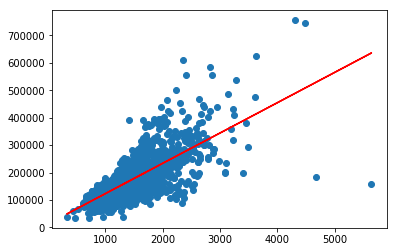

In [43]:
reg1 = LinearRegression()
reg1.fit(X1_train, y_train)

print('coefficient = ', reg1.coef_[0]) # 説明変数の係数を出力
print('intercept = ', reg1.intercept_) # 切片を出力

plt.scatter(X1, y)
plt.plot(X1, reg1.predict(X1), color="r")
plt.show()

MSE train data:  6540754607.737947
MSE test data :  6962396969.988982


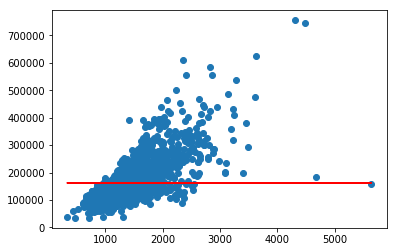

In [44]:
#SVR
svr1 = SVR()
svr1.fit(X1_train, y_train)

y1_train_pred = svr1.predict(X1_train_sc) # 学習データに対する目的変数を予測
y1_pred = svr1.predict(X1_test_sc)   # 検証データに対する目的変数を予測

print('MSE train data: ', mean_squared_error(y_train, y1_train_pred)) # 学習データを用いたときの平均二乗誤差を出力
print('MSE test data : ', mean_squared_error(y_test, y1_pred))         # 検証データを用いたときの平均二乗誤差を出力

#作図
plt.scatter(X1, y)
plt.plot(X1, svr1.predict(X1), color="r")
plt.show()

MSE train data:  634230330.8090664
MSE test data :  4677765708.39187


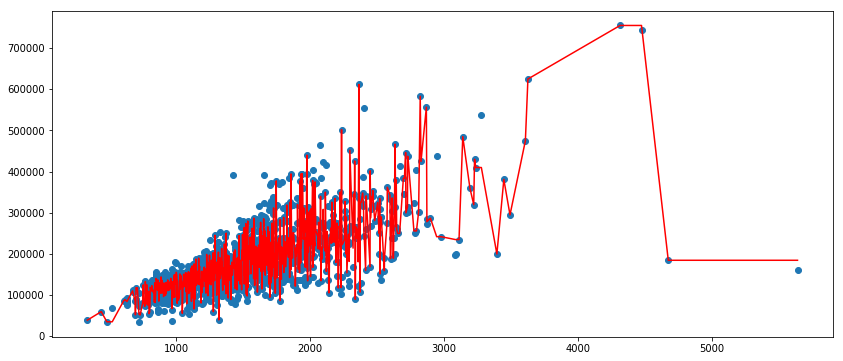

In [51]:
#DecisionTreeRegressor
dtr1 = DecisionTreeRegressor()
dtr1.fit(X1_train, y_train)

y1_train_pred = dtr1.predict(X1_train) # 学習データに対する目的変数を予測
y1_pred = dtr1.predict(X1_test)   # 検証データに対する目的変数を予測

print('MSE train data: ', mean_squared_error(y_train, y1_train_pred)) # 学習データを用いたときの平均二乗誤差を出力
print('MSE test data : ', mean_squared_error(y_test, y1_pred))         # 検証データを用いたときの平均二乗誤差を出力

#作図


plt.figure(figsize=(14,6))
sort_idx = X1.flatten().argsort()

plt.scatter(X1[sort_idx], y[sort_idx])
plt.plot(X1[sort_idx], dtr1.predict(X1[sort_idx]), color="r")
plt.show()


MSE train data:  1187335845.4543676
MSE test data :  4079118718.500764


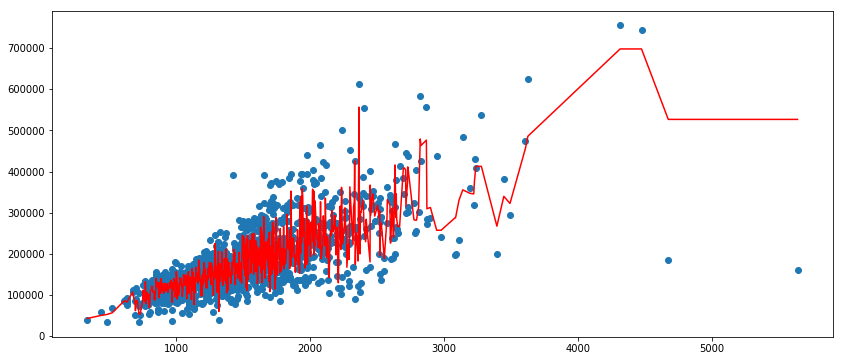

In [50]:
#RandomForestRegressor
rfr1 = RandomForestRegressor()
rfr1.fit(X1_train, y_train)

y1_train_pred = rfr1.predict(X1_train) # 学習データに対する目的変数を予測
y1_pred = rfr1.predict(X1_test)   # 検証データに対する目的変数を予測

print('MSE train data: ', mean_squared_error(y_train, y1_train_pred)) # 学習データを用いたときの平均二乗誤差を出力
print('MSE test data : ', mean_squared_error(y_test, y1_pred))         # 検証データを用いたときの平均二乗誤差を出力

plt.figure(figsize=(14,6))
sort_idx = X1.flatten().argsort()

plt.scatter(X1[sort_idx], y[sort_idx])
plt.plot(X1[sort_idx], rfr1.predict(X1[sort_idx]), color="r")
plt.show()

【可視化の考察】

- 線形回帰学習データに対してモデルとしての直線を描いている
- 決定木とランダムフォレストは学習データに対して過度にフィッティングしており、グラフが複雑な形となっている

- 今回、特徴量は１種類で行なっているので可視化が可能となっているが、実務的には多数の変数を扱うので、図示は難しい。MSEの値を判断基準としてモデルを改良していく。

- 決定木やランダムフォレストに関しては、学習データを変えてモデルを複数作成し、それらの平均を取ることで精度を上げていくやり方がある。